<a href="https://colab.research.google.com/github/lacakp/Project-Mask-Detection/blob/main/Project_Mask_Detection_Train_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Project Mask Detection training model use machine learning

https://medium.com/analytics-vidhya/what-is-a-pipeline-in-machine-learning-how-to-create-one-bda91d0ceaca

dataset - https://www.kaggle.com/omkargurav/face-mask-dataset

In [1]:
# https://medium.com/super-ai-engineer/kora-%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B8%A1%E0%B8%B7%E0%B8%AD%E0%B8%94%E0%B8%B5-%E0%B9%86-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%84%E0%B8%99%E0%B8%A3%E0%B8%B1%E0%B8%81-google-colab-137c193641c0
!pip install -q kora # https://github.com/korakot/kora

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 


In [2]:
from kora import kaggle
kaggle.search('omkargurav/face-mask-dataset')
# https://www.kaggle.com/omkargurav/face-mask-dataset

,ref,title,size,lastUpdated,downloadCount
0,omkargurav/face-mask-dataset,Face Mask Detection Dataset,163MB,2020-07-31 18:34:42,5054


In [3]:
kaggle.download('omkargurav/face-mask-dataset')

 99% 162M/163M [00:05<00:00, 37.5MB/s]
100% 163M/163M [00:05<00:00, 32.1MB/s]


# Face mask detection using computer vision

In [4]:
import tensorflow as tf
import numpy as np 

### Get data - load dataset

- หน้าที่มีหน้ากาก กับหน้าที่ไม่มีหน้ากาก
- ใช้ภาพทดสอบจาก image_dataset_from_ditectory() ของ keras.preprocssing

In [5]:
!pwd

/content


In [6]:
width, height = 224, 224
# mobileNetv2 network
batch_size = 32
data_dir = r"/content/data"

In [7]:
training = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'training',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 7553 files belonging to 2 classes.
Using 5288 files for training.


In [8]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'validation',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 7553 files belonging to 2 classes.
Using 2265 files for validation.


In [9]:
classes = training.class_names
print(classes)
print(training)

['with_mask', 'without_mask']
<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


Check Image in Dataset

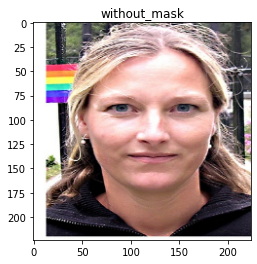

In [10]:
import matplotlib.pyplot as plt
for images, labels in training.take(1):
  plt.imshow(images[3].numpy().astype('uint8'))
  plt.title(classes[labels[3]])

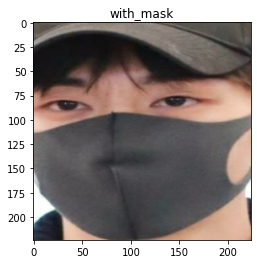

In [12]:
for images, labels in training.take(1):
  plt.imshow(images[3].numpy().astype('uint8'))
  plt.title(classes[labels[3]])

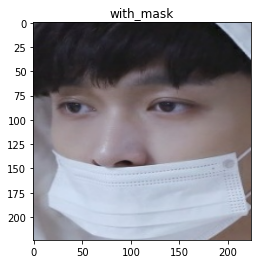

In [13]:
for images, labels in training.take(1):
  plt.imshow(images[3].numpy().astype('uint8'))
  plt.title(classes[labels[3]])

## MobileNetv2 model

In [14]:
from tensorflow.keras.applications import MobileNetV2

In [15]:
model = MobileNetV2(weights = 'imagenet')

14548992/14536120 [==============================] - 0s 0us/step


รันโมเดล (compile)

In [16]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [17]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### Training the model


https://keras.rstudio.com/reference/fit.html#arguments

validation_data	
Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. This could be a list (x_val, y_val) or a list (x_val, y_val, val_sample_weights). validation_data will override validation_split.


- หมายถึง ข้อมูลการตรวจสอบ ประเมินค่า loss และ model metrics เมื่อจบ epoch


epochs
Number of epochs to train the model. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.

- epochs	คือ จำนวนครั้งในการฝึกโมเดล

In [18]:
# train 3 ครั้ง
face_mask_detection = model.fit(training, validation_data= validation, epochs=3)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


166/166 [==============================] - 104s 401ms/step - loss: 0.1834 - accuracy: 0.9635 - val_loss: 16.2736 - val_accuracy: 0.5055
Epoch 2/3
166/166 [==============================] - 65s 388ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 3.1604 - val_accuracy: 0.7377
Epoch 3/3
166/166 [==============================] - 65s 387ms/step - loss: 0.0243 - accuracy: 0.9936 - val_loss: 0.9901 - val_accuracy: 0.9002


- ETA คือเวลาที่คาดว่า กำลังจะเสร็จ
- loss คือ ค่าความสูญเสีย (ผิดพลาด) 
- accuracy คือค่าความถูกต้อง

### Predicting

In [ ]:
# for upload image
from google.colab import files
uploaded = files.upload()

Saving testimg.jpg to testimg.jpg


In [ ]:
# โหลดภาพมา
# image = tf.keras.preprocessing.image.load_img(image_path)
img = tf.keras.preprocessing.image.load_img('testimg.jpg', target_size=(height, width))

# แปลงเป็น array
image_array = tf.keras.preprocessing.image.img_to_array(img)
# ขยายมิติภาพเพื่อให้ fit กับ model
image_array = tf.expand_dims(image_array, 0)

# เช็ค shape ภาพ
image_array.shape

TensorShape([1, 224, 224, 3])

In [ ]:
import random 
predictions = model.predict(image_array)
score = tf.nn.softmax(predictions[0])

for i in range(15):
  ran = random.randint(1, len(score))
  res = score[ran]*100000
  print(res)
print(type(res))


tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


*Save the model*

In [19]:
model.save('mask_detection_model', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Face Detection

In [21]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
from PIL import Image
import io

In [22]:
# haarcascade
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
# load model (If not running the code part Train Model)
# !wget https://raw.githubusercontent.com/lacakp/Project-Mask-Detection/main/mask_detection_model

--2021-09-24 14:34:11--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.09s   

2021-09-24 14:34:12 (9.93 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [24]:
## โค้ด videocapture 
# reference 
# - AI บ้าน บ้าน (รศ.ดร.ปริญญา สงวนสัตย์)
# - https://www.youtube.com/watch?v=1VziTgVt4GQ&t=11s
# - https://colab.research.google.com/drive/1v4zM9Gcxt6r5pHGN8HS6CYsLTt1VoZsG

def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);

      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.8);
            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

def byte2image(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def image2byte(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x


In [26]:
# Pre-processing
import cv2
import numpy as np
from keras.models import load_model
import tensorflow as tf
from google.colab.patches import cv2_imshow
import time
model = load_model("./mask_detection_model")
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
# processing

# model shape  shape=(None, 224, 224, 3)

labels_dict={0:'without mask',1:'mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

VideoCapture()
eval_js('create()')
while True:
    byte = eval_js('capture()')
    frame = byte2image(byte)
    frame = cv2.flip(frame,1,1) # สลับเพื่อให้ไม่เหมือนกระจก
    # gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    new_img = cv2.resize(frame, (frame.shape[1] // 1, frame.shape[0] // 1)) # resize
    # สำหรับตรวจจับใบหน้า
    faces = face_detector.detectMultiScale(new_img)
    for x, y, w, h in faces:
      face_img = new_img[y:x+h, x:x+w] # ดึงพิกัดใบหน้า
      resized = cv2.resize(face_img, (224, 224)) # ให้ภาพใบหน้า fit กับโมเดล (224,224)
      img_array = tf.keras.preprocessing.image.img_to_array(resized) # แปลงใบหน้าเป็น array
      img_array = tf.expand_dims(img_array, 0) #ขยายมิติภาพฟิตกับโมดล
      predictions = model.predict(img_array) # ทำนายบน ROI (Region of Interest)
      score = tf.nn.softmax(predictions[0]) # ผลลัพธ์
      label = np.argmax(score)

      # Post-Processing

      if label == 0:
        cv2.rectangle(new_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(new_img, "mask", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
      elif label == 1:
        cv2.rectangle(new_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(new_img, "No mask", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
      else:
        None
      # pass
      # แสดงผลหลังจากทำนาย
      new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
      cv2_imshow(new_img)
      # eval_js('showimg("{}")'.format(image2byte(new_img)))
      print(np.argmax(score), 100 * np.max(score))
      time.sleep(1)

    eval_js('showimg("{}")'.format(image2byte(frame)))